# **Dados de raça/cor dos discentes**

In [0]:
import pandas as pd

In [0]:
url_discentes_2019 = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/a55aef81-e094-4267-8643-f283524e3dd7/download/discentes-2019.csv"
url_discentes_2018 = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/146b749b-b9d0-49b2-b114-ac6cc82a4051/download/discentes-2018.csv"
url_discentes_2017 = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dc732572-a51a-4d4a-a39d-2db37cbe5382/download/discentes-2017.csv"
url_discentes_2016 = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016.csv"
url_discentes_2015 = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015.csv"
url_discentes_2014 = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014.csv"
url_discentes_2013 = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dba208c2-822f-4e26-adc3-b61d4cb110b6/download/discentes-2013.csv"
url_discentes_2012 = "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/fc283aa9-61a7-4cf0-91fb-c403c0817b48/download/discentes-2012.csv"


url_cursos_2019 = "http://dados.ufrn.br/dataset/02526b96-cf40-4507-90b0-3afe5ddd53e7/resource/a10bc434-9a2d-491a-ae8c-41cf643c35bc/download/cursos-de-graduacao.csv"



def gera_dados(url_discentes, url_cursos, ano):
  discentes = pd.read_csv(url_discentes, sep=';')
  dados_discentes = discentes[['sexo', 'raca', 'tipo_discente', 'status', 'sigla_nivel_ensino', 'nome_curso', 'id_curso']]
  dados_discentes = dados_discentes[(dados_discentes['status'] == 'ATIVO') & (dados_discentes['sigla_nivel_ensino'] == 'G')]
  dados_discentes.head()
  
  url_cursos = "http://dados.ufrn.br/dataset/02526b96-cf40-4507-90b0-3afe5ddd53e7/resource/a10bc434-9a2d-491a-ae8c-41cf643c35bc/download/cursos-de-graduacao.csv"
  cursos = pd.read_csv(url_cursos, sep=';')
  dados_cursos = cursos[['nome', 'nivel_ensino', 'area_conhecimento', 'id_curso']]
  dados_cursos = dados_cursos[(dados_cursos['nivel_ensino'] == 'GRADUAÇÃO')]
  dados_cursos.head()
  
  discentes_cursos = pd.merge(left=dados_discentes, right=dados_cursos, on='id_curso')
  
  cor_por_curso = pd.pivot_table(discentes_cursos, values='nome_curso', index=['id_curso'],                    
            columns=['raca'], aggfunc=lambda x: len(x), fill_value=0)
  cor_por_curso.columns = cor_por_curso.columns.str.lower()
  names = {
      "amarelo (de origem oriental)": "amarelo",
      "indígeno": "indigeno",
      "não informado": "nao_informado"
  }
  cor_por_curso = cor_por_curso.rename(columns=names)
  cor_por_curso.head()
  
  cor_por_area = pd.pivot_table(discentes_cursos, values='nome_curso', index=['area_conhecimento'],                    
            columns=['raca'], aggfunc=lambda x: len(x), fill_value=0)
  cor_por_area.columns = cor_por_area.columns.str.lower()
  names = {
      "amarelo (de origem oriental)": "amarelo",
      "indígeno": "indigeno",
      "não informado": "nao_informado"
  }
  cor_por_area = cor_por_area.rename(columns=names)
  
  dist_cursos_ano = dados_cursos.set_index('id_curso')
  total_racas = cor_por_curso.sum(axis='columns')

  for raca in cor_por_curso.columns:
    dist_cursos_ano[raca] = cor_por_curso[raca]
    dist_cursos_ano[raca+'_no_curso(%)'] = (cor_por_curso[raca] / total_racas) * 100
    dist_cursos_ano[raca+'_no_curso(%)'] = dist_cursos_ano[raca+'_no_curso(%)'].fillna(0)

  remover = dist_cursos_ano.loc[(dist_cursos_ano["amarelo_no_curso(%)"] == 0) & 
                                 (dist_cursos_ano["branco_no_curso(%)"]==0) & 
                                 (dist_cursos_ano["indigeno_no_curso(%)"]==0) & 
                                 (dist_cursos_ano["negro_no_curso(%)"]==0) & 
                                 (dist_cursos_ano["nao_informado_no_curso(%)"]==0) & 
                                 (dist_cursos_ano["pardo_no_curso(%)"]==0), 'nome']
  dist_cursos_ano = dist_cursos_ano.drop(remover.index)
  
  dist_areas_ano = dados_cursos.set_index('area_conhecimento')
  total_racas = cor_por_area.sum(axis='columns')

  for raca in cor_por_area.columns:
    dist_areas_ano[raca+'_na_area(%)'] = (cor_por_area[raca] / total_racas) * 100
    dist_areas_ano[raca+'_na_area(%)'] = dist_areas_ano[raca+'_na_area(%)'].fillna(0)

  remover = dist_areas_ano.loc[(dist_areas_ano["amarelo_na_area(%)"] == 0) & 
                                 (dist_areas_ano["branco_na_area(%)"]==0) & 
                                 (dist_areas_ano["indigeno_na_area(%)"]==0) & 
                                 (dist_areas_ano["negro_na_area(%)"]==0) & 
                                 (dist_areas_ano["nao_informado_na_area(%)"]==0) & 
                                 (dist_areas_ano["pardo_na_area(%)"]==0), 'nome']
  dist_areas_ano = dist_areas_ano.drop(remover.index)
  
  amarelo = dist_cursos_ano["amarelo_no_curso(%)"].values
  branco = dist_cursos_ano["branco_no_curso(%)"].values
  indigeno = dist_cursos_ano["indigeno_no_curso(%)"].values
  negro = dist_cursos_ano["negro_no_curso(%)"].values
  nao_informado = dist_cursos_ano["nao_informado_no_curso(%)"].values
  pardo = dist_cursos_ano["pardo_no_curso(%)"].values

  index = dist_cursos_ano["nome"].values

  df = pd.DataFrame({'Amarelo': amarelo, 'Branco': branco, 
                     'Indigeno': indigeno, 'Negro': negro, 
                     'Não informado': nao_informado, 'Pardo': pardo}, index=index)
  ax = df.plot.barh(figsize=(30, 100))
  
  dist_areas_ano.reset_index(inplace=True)
  dist_areas_ano.drop_duplicates(subset ="area_conhecimento", keep = 'first', inplace = True) 
  amarelo = dist_areas_ano["amarelo_na_area(%)"].values
  branco = dist_areas_ano["branco_na_area(%)"].values
  indigeno = dist_areas_ano["indigeno_na_area(%)"].values
  negro = dist_areas_ano["negro_na_area(%)"].values
  nao_informado = dist_areas_ano["nao_informado_na_area(%)"].values
  pardo = dist_areas_ano["pardo_na_area(%)"].values

  index = dist_areas_ano["area_conhecimento"].values

  df = pd.DataFrame({'Amarelo': amarelo, 'Branco': branco, 
                     'Indigeno': indigeno, 'Negro': negro, 
                     'Não informado': nao_informado, 'Pardo': pardo}, index=index)
  ax = df.plot.barh(figsize=(10, 10),stacked=True)

# **Montando tabela dos cursos e áreas 2019** 

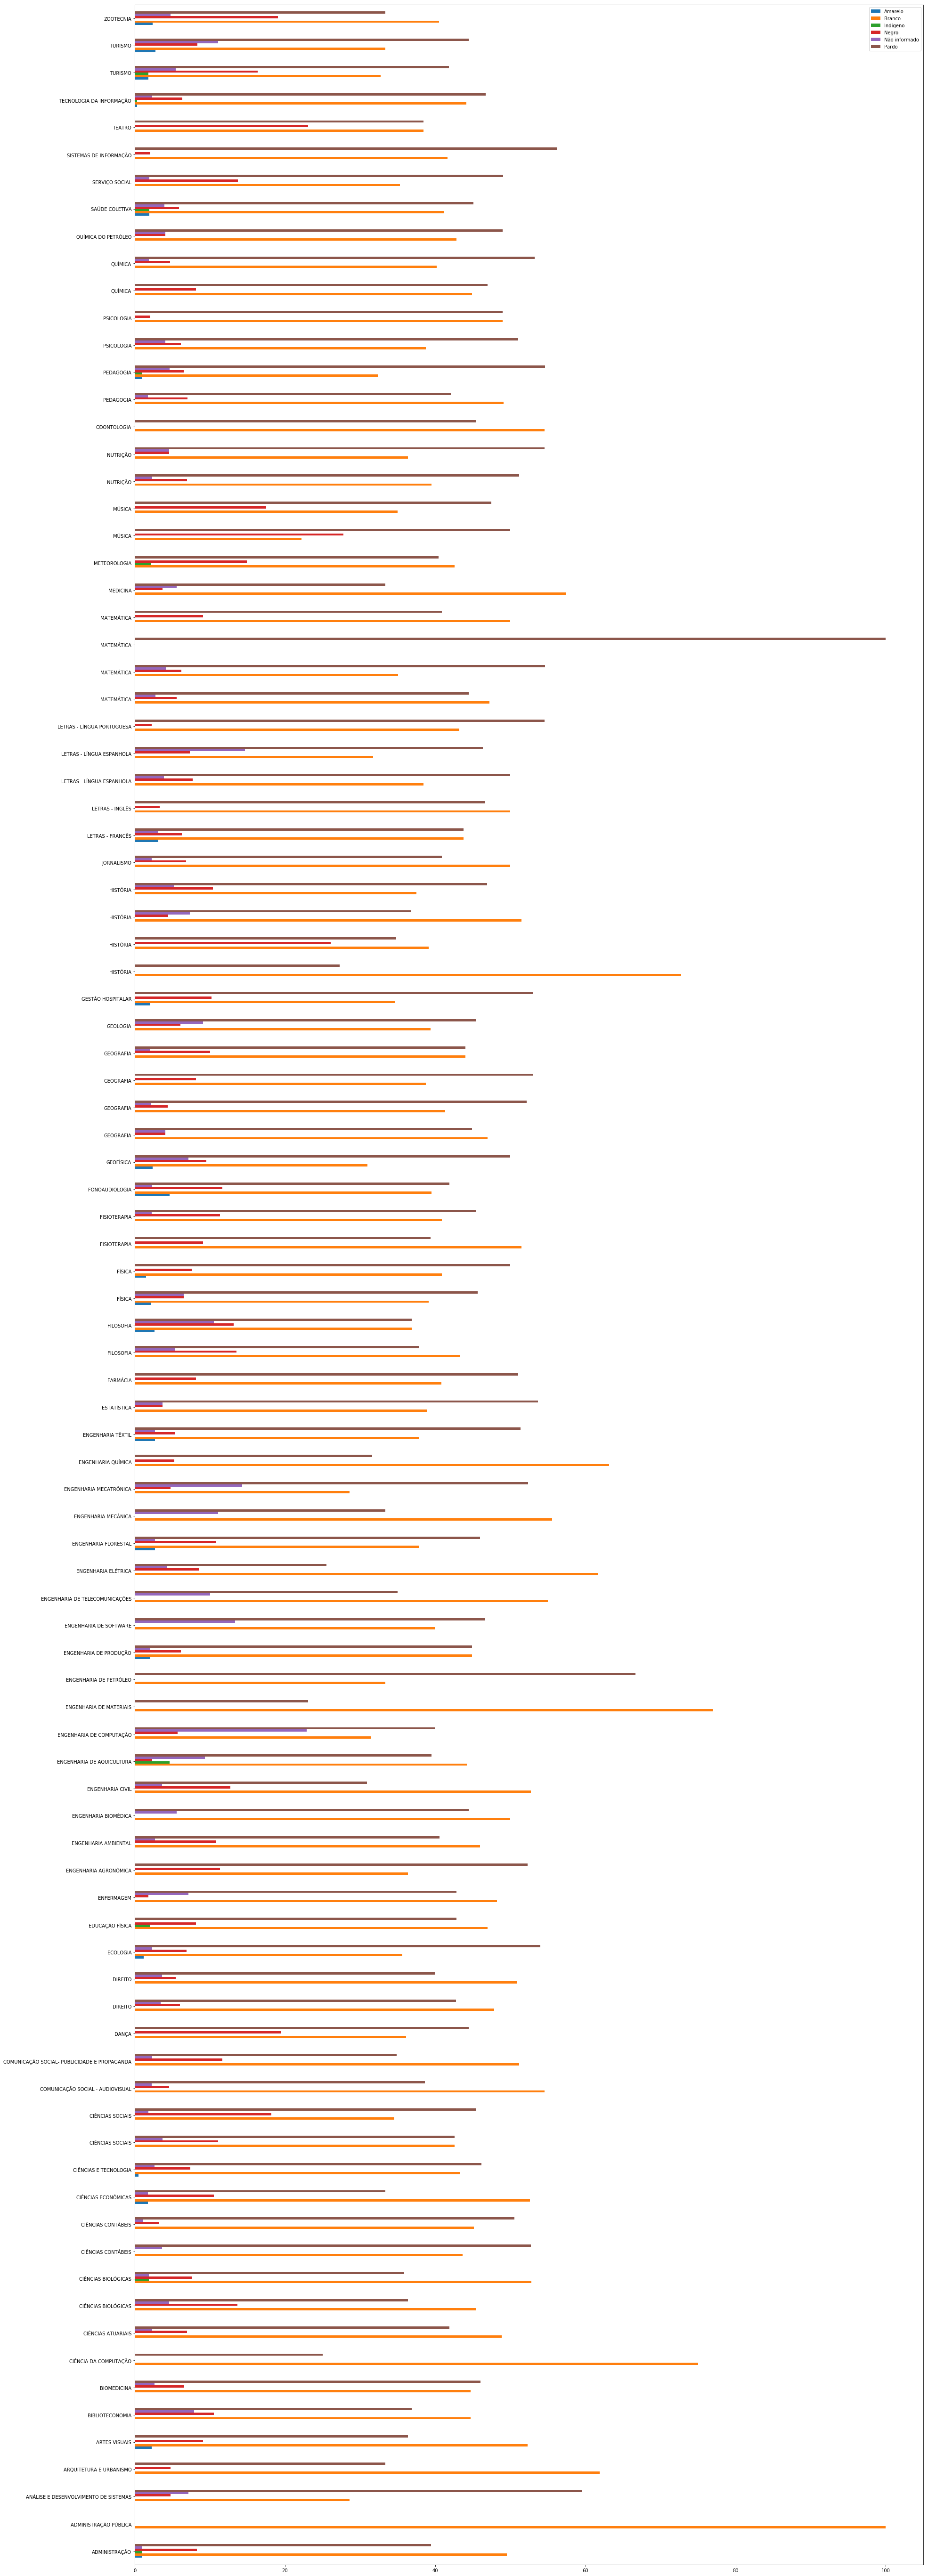

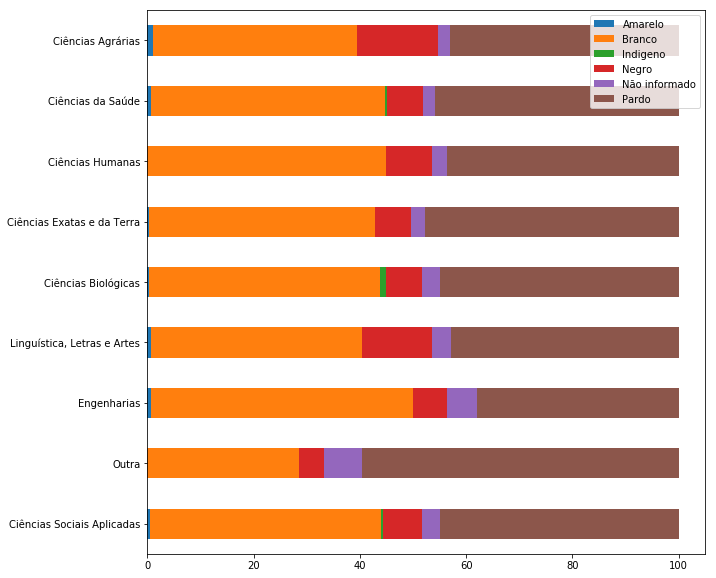

In [0]:
gera_dados(url_discentes_2019, url_cursos_2019, 2019)

# **Montando tabela dos cursos e áreas 2018**

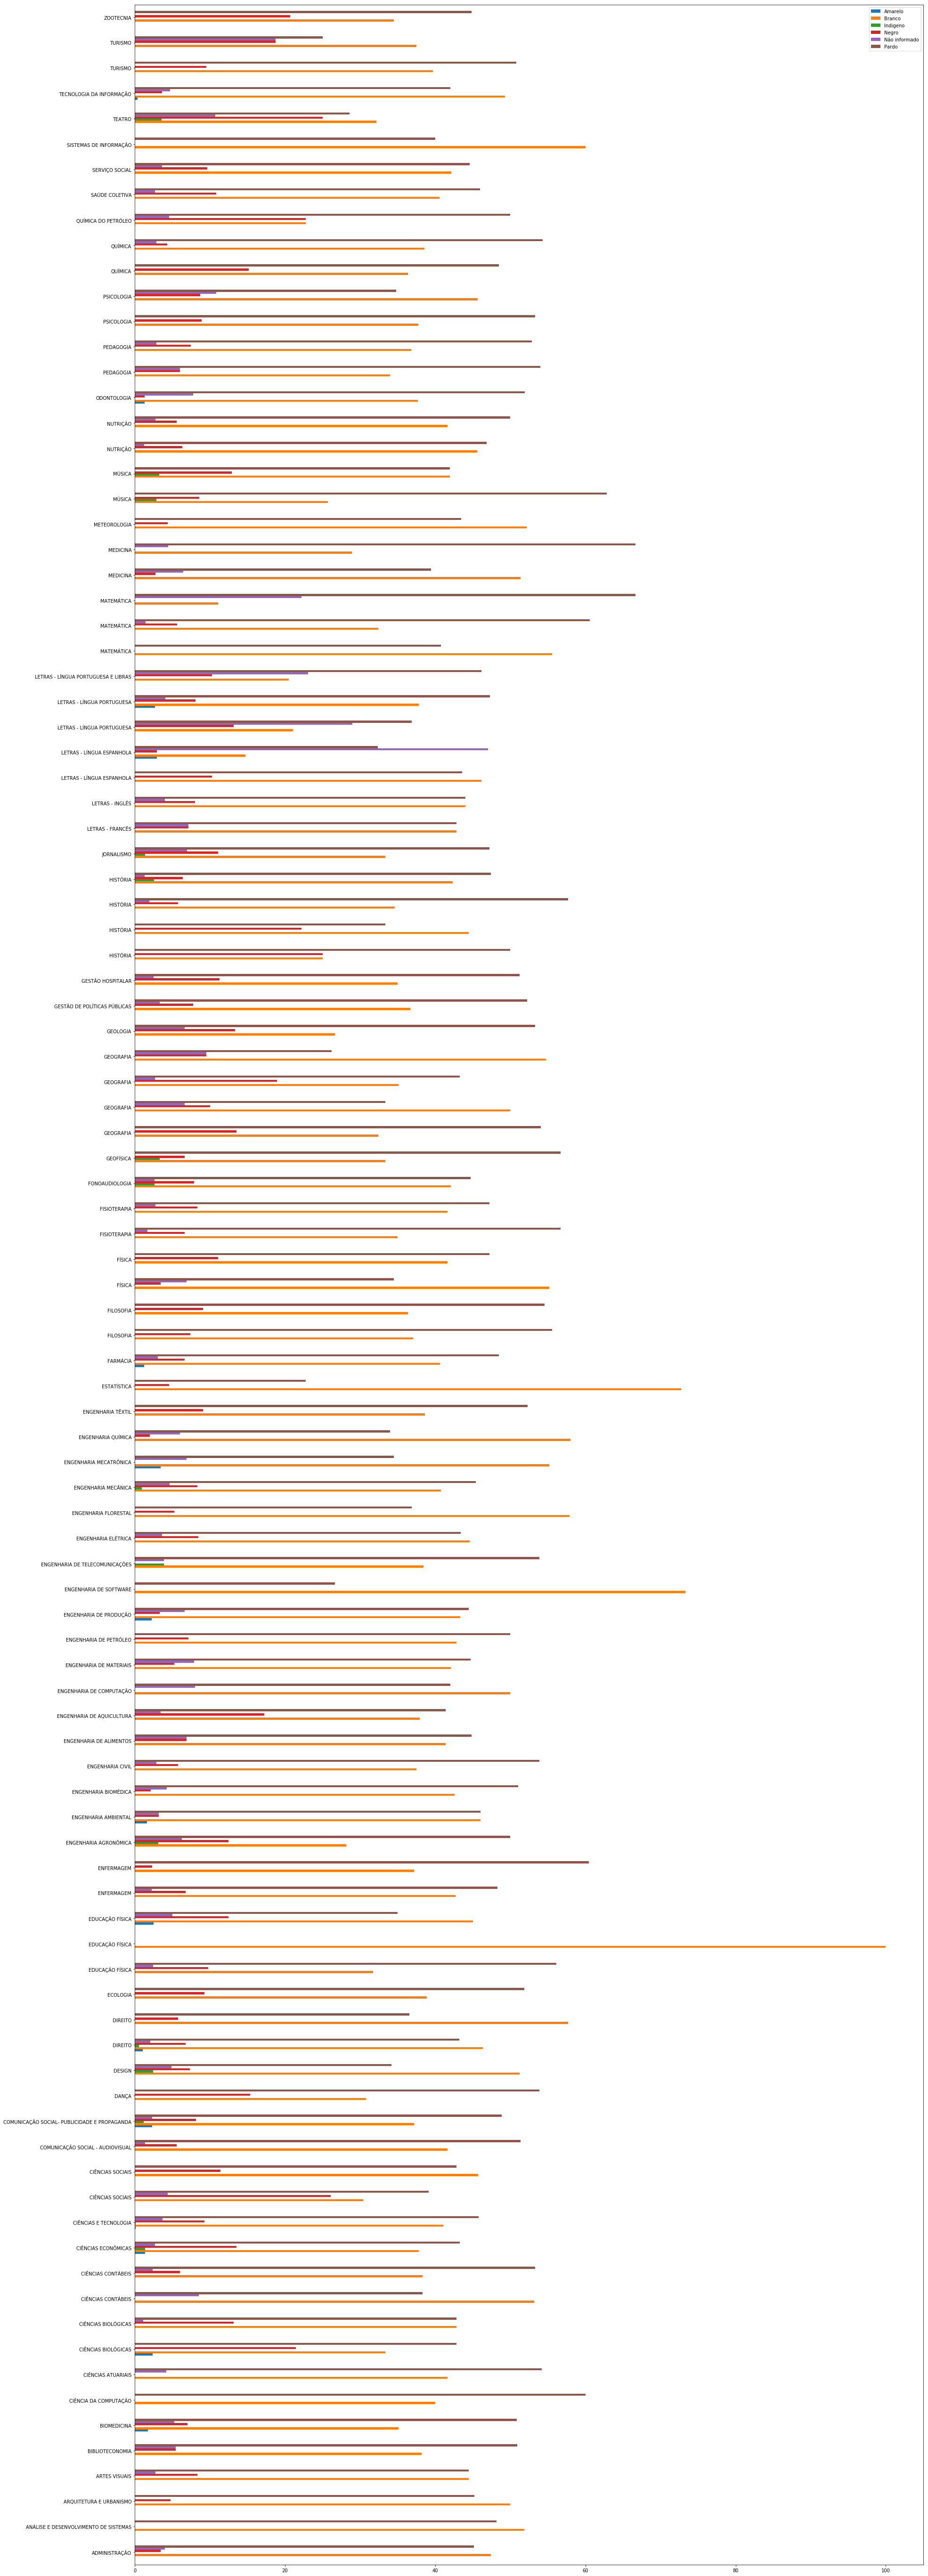

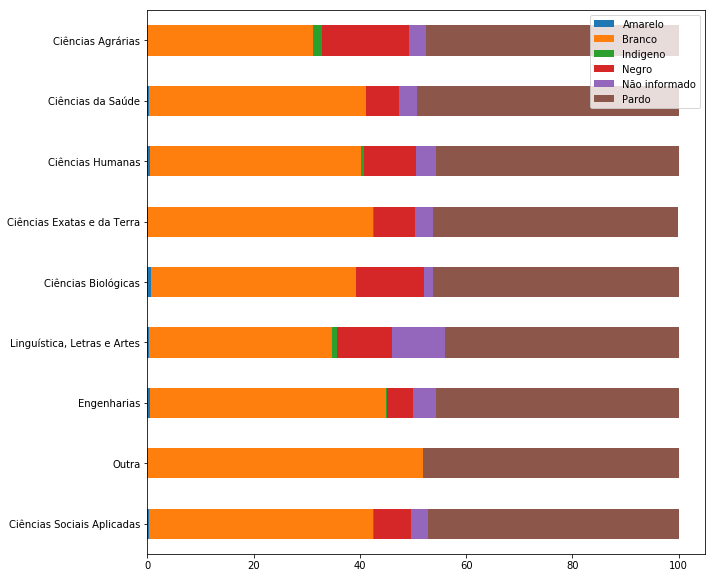

In [0]:
gera_dados(url_discentes_2018, url_cursos_2019, 2018)

# **Montando tabela dos cursos e áreas 2017**

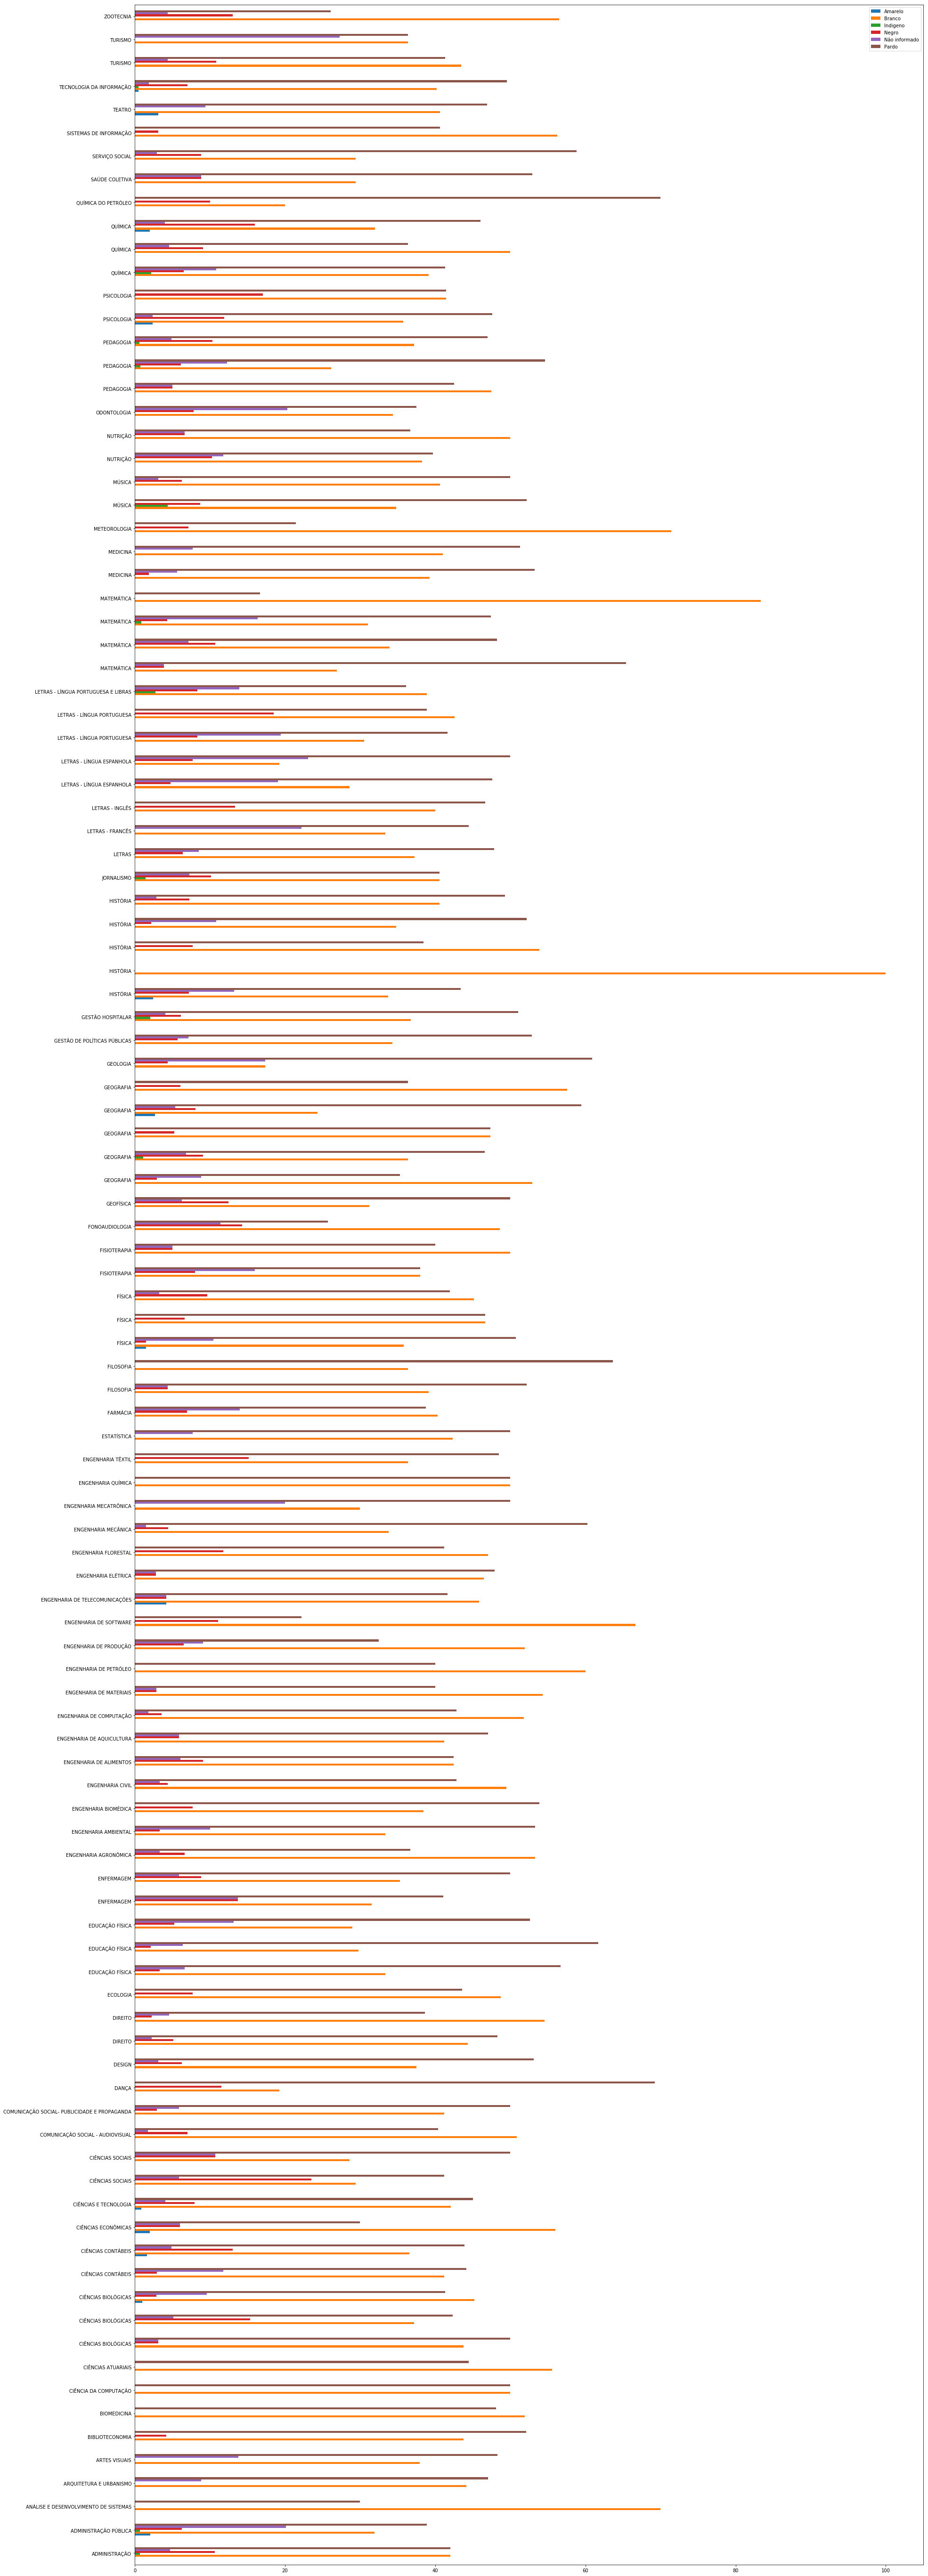

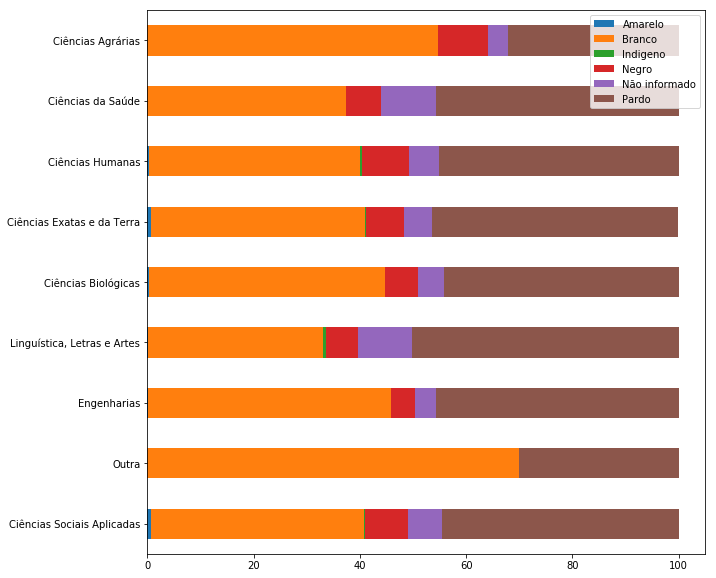

In [0]:
gera_dados(url_discentes_2017, url_cursos_2019, 2017)

# **Montando tabela dos cursos e áreas 2016**

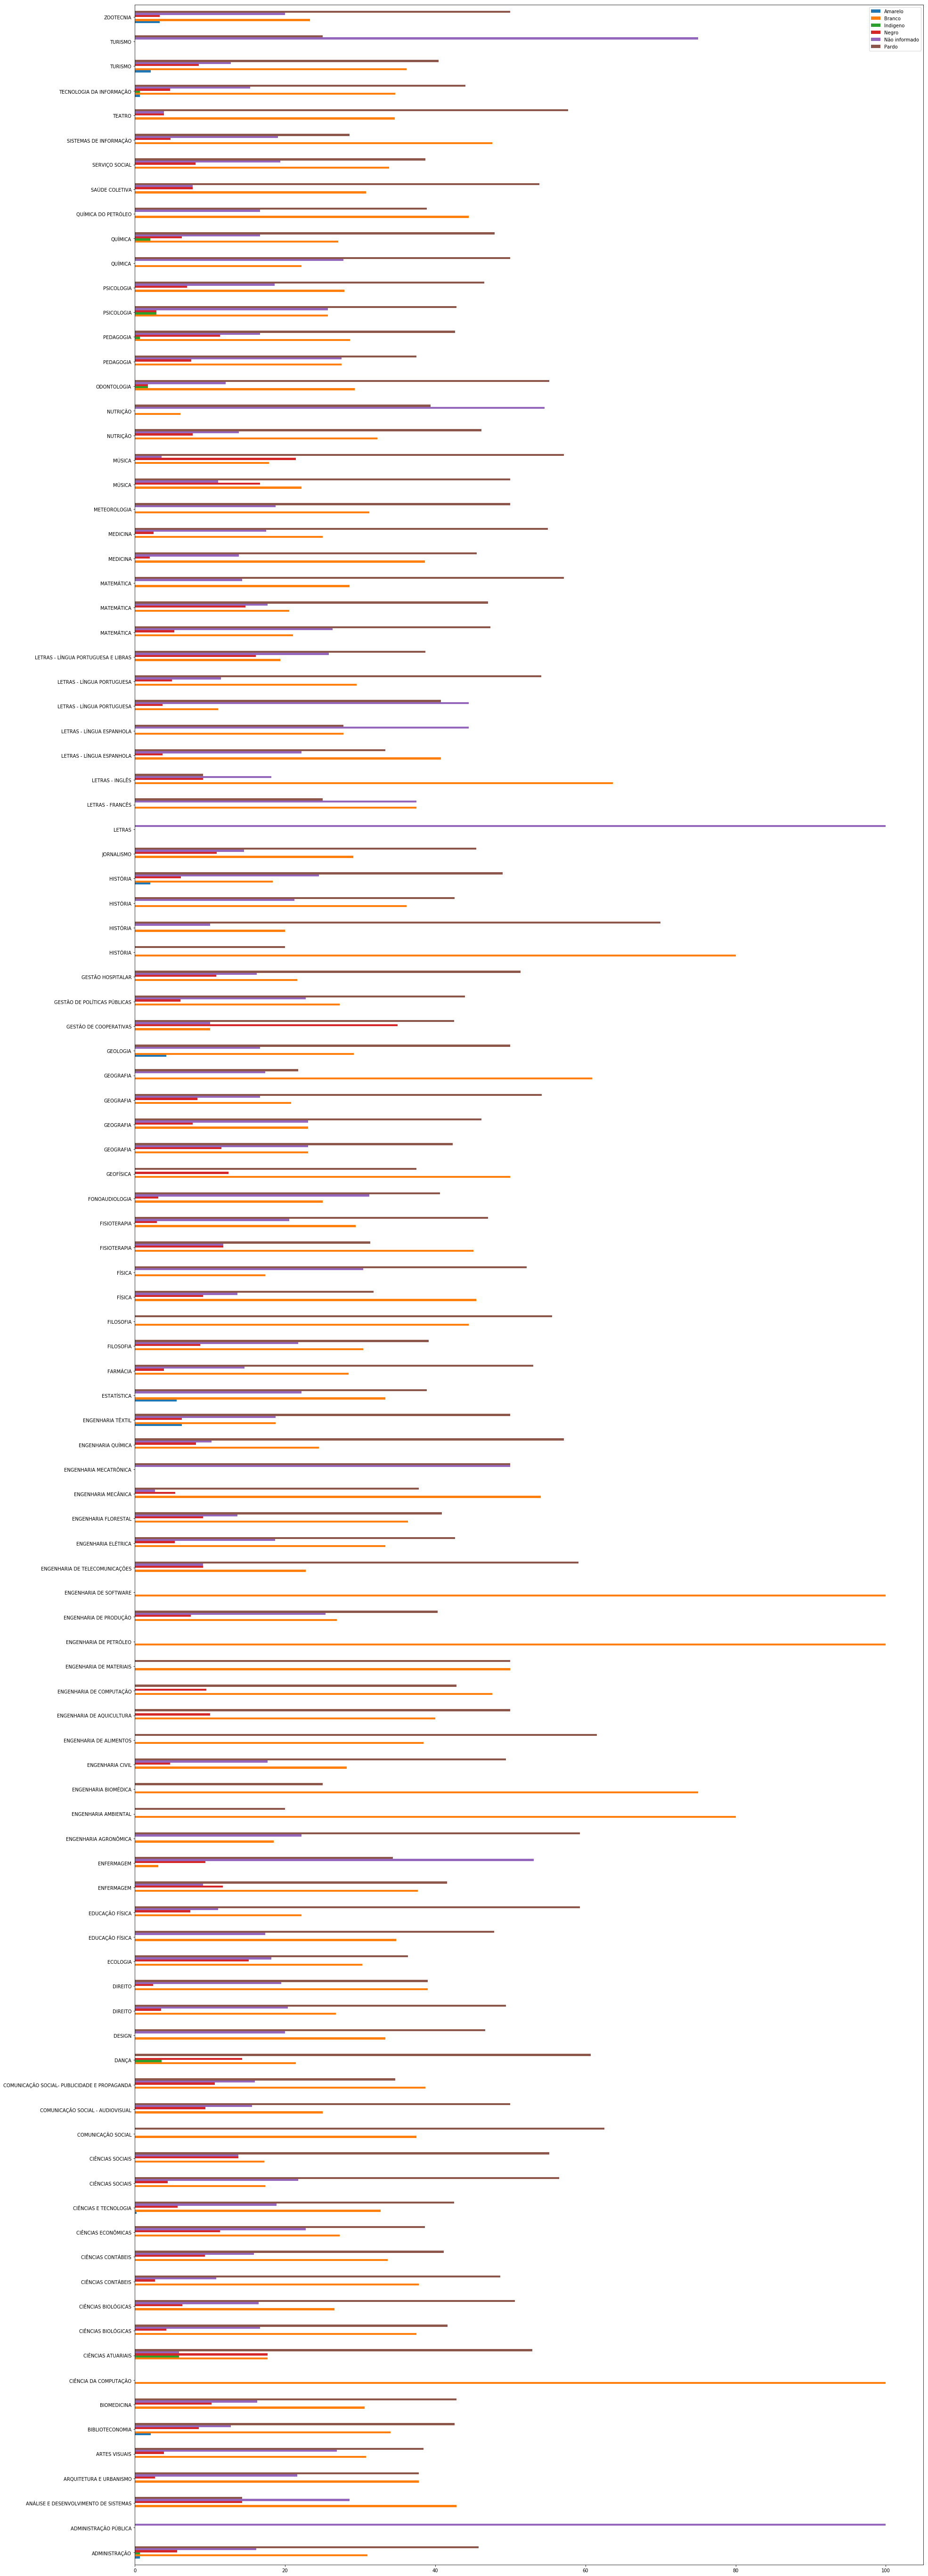

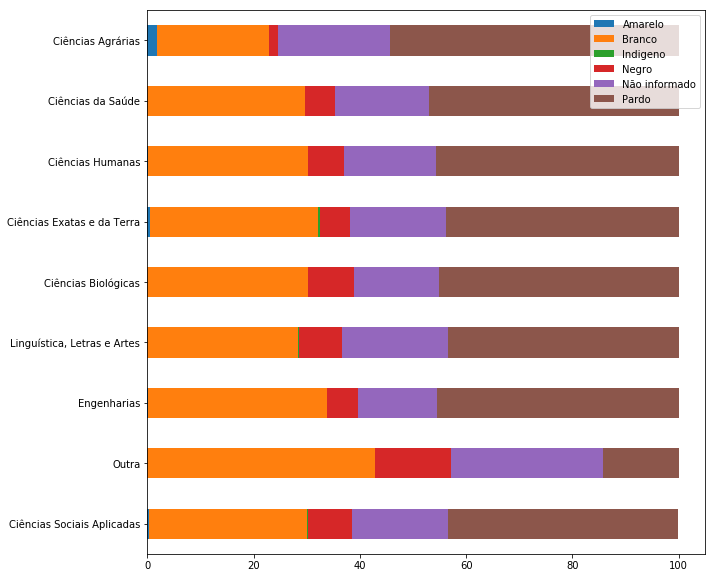

In [0]:
gera_dados(url_discentes_2016, url_cursos_2019, 2016)

# **Montando tabela dos cursos e áreas 2015**

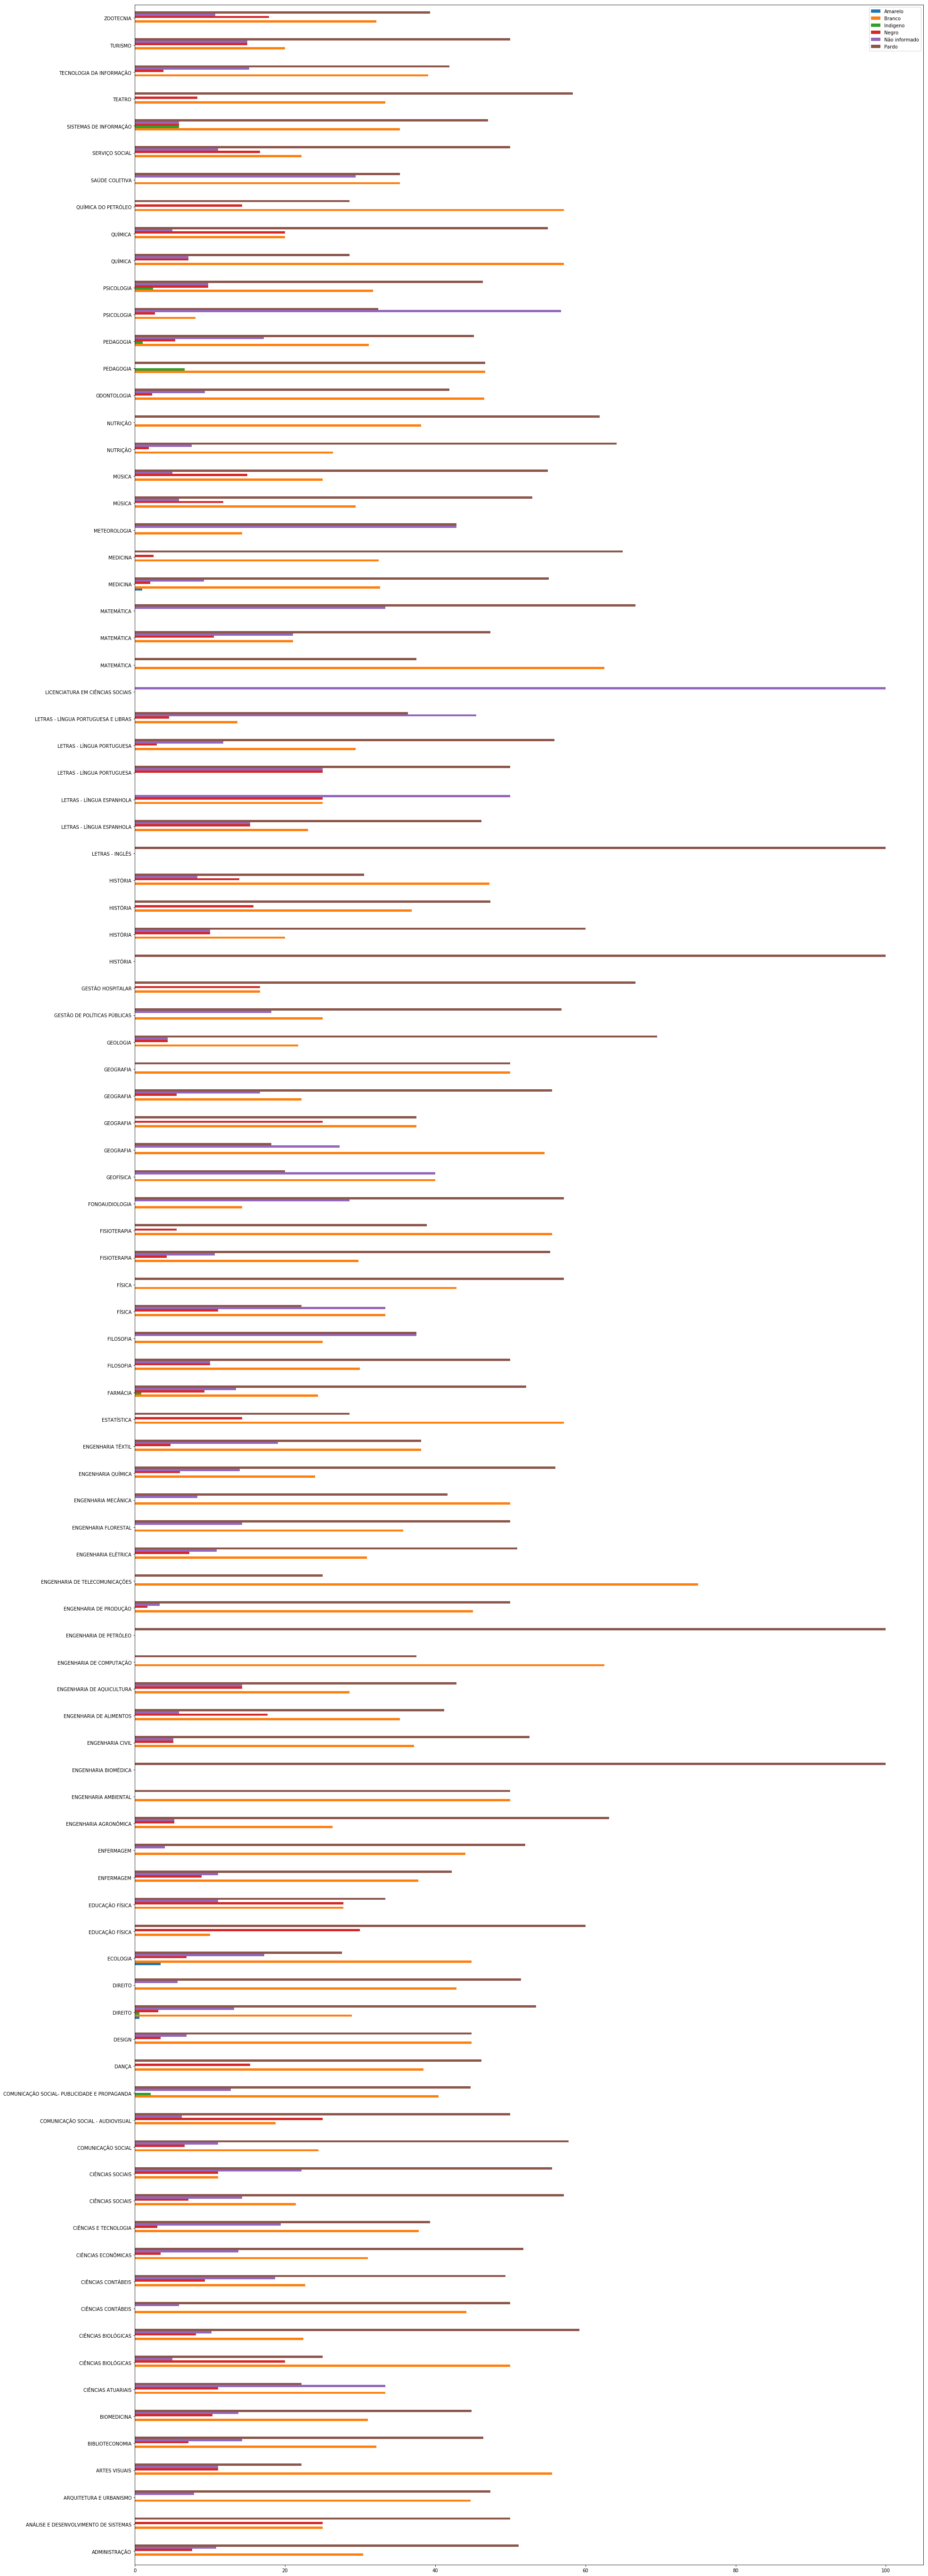

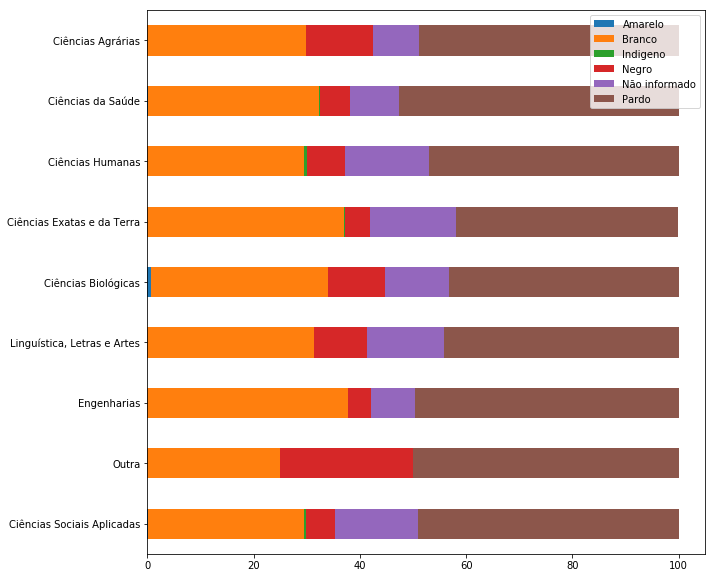

In [0]:
gera_dados(url_discentes_2015, url_cursos_2019, 2015)

# **Montando tabela dos cursos e áreas 2014**

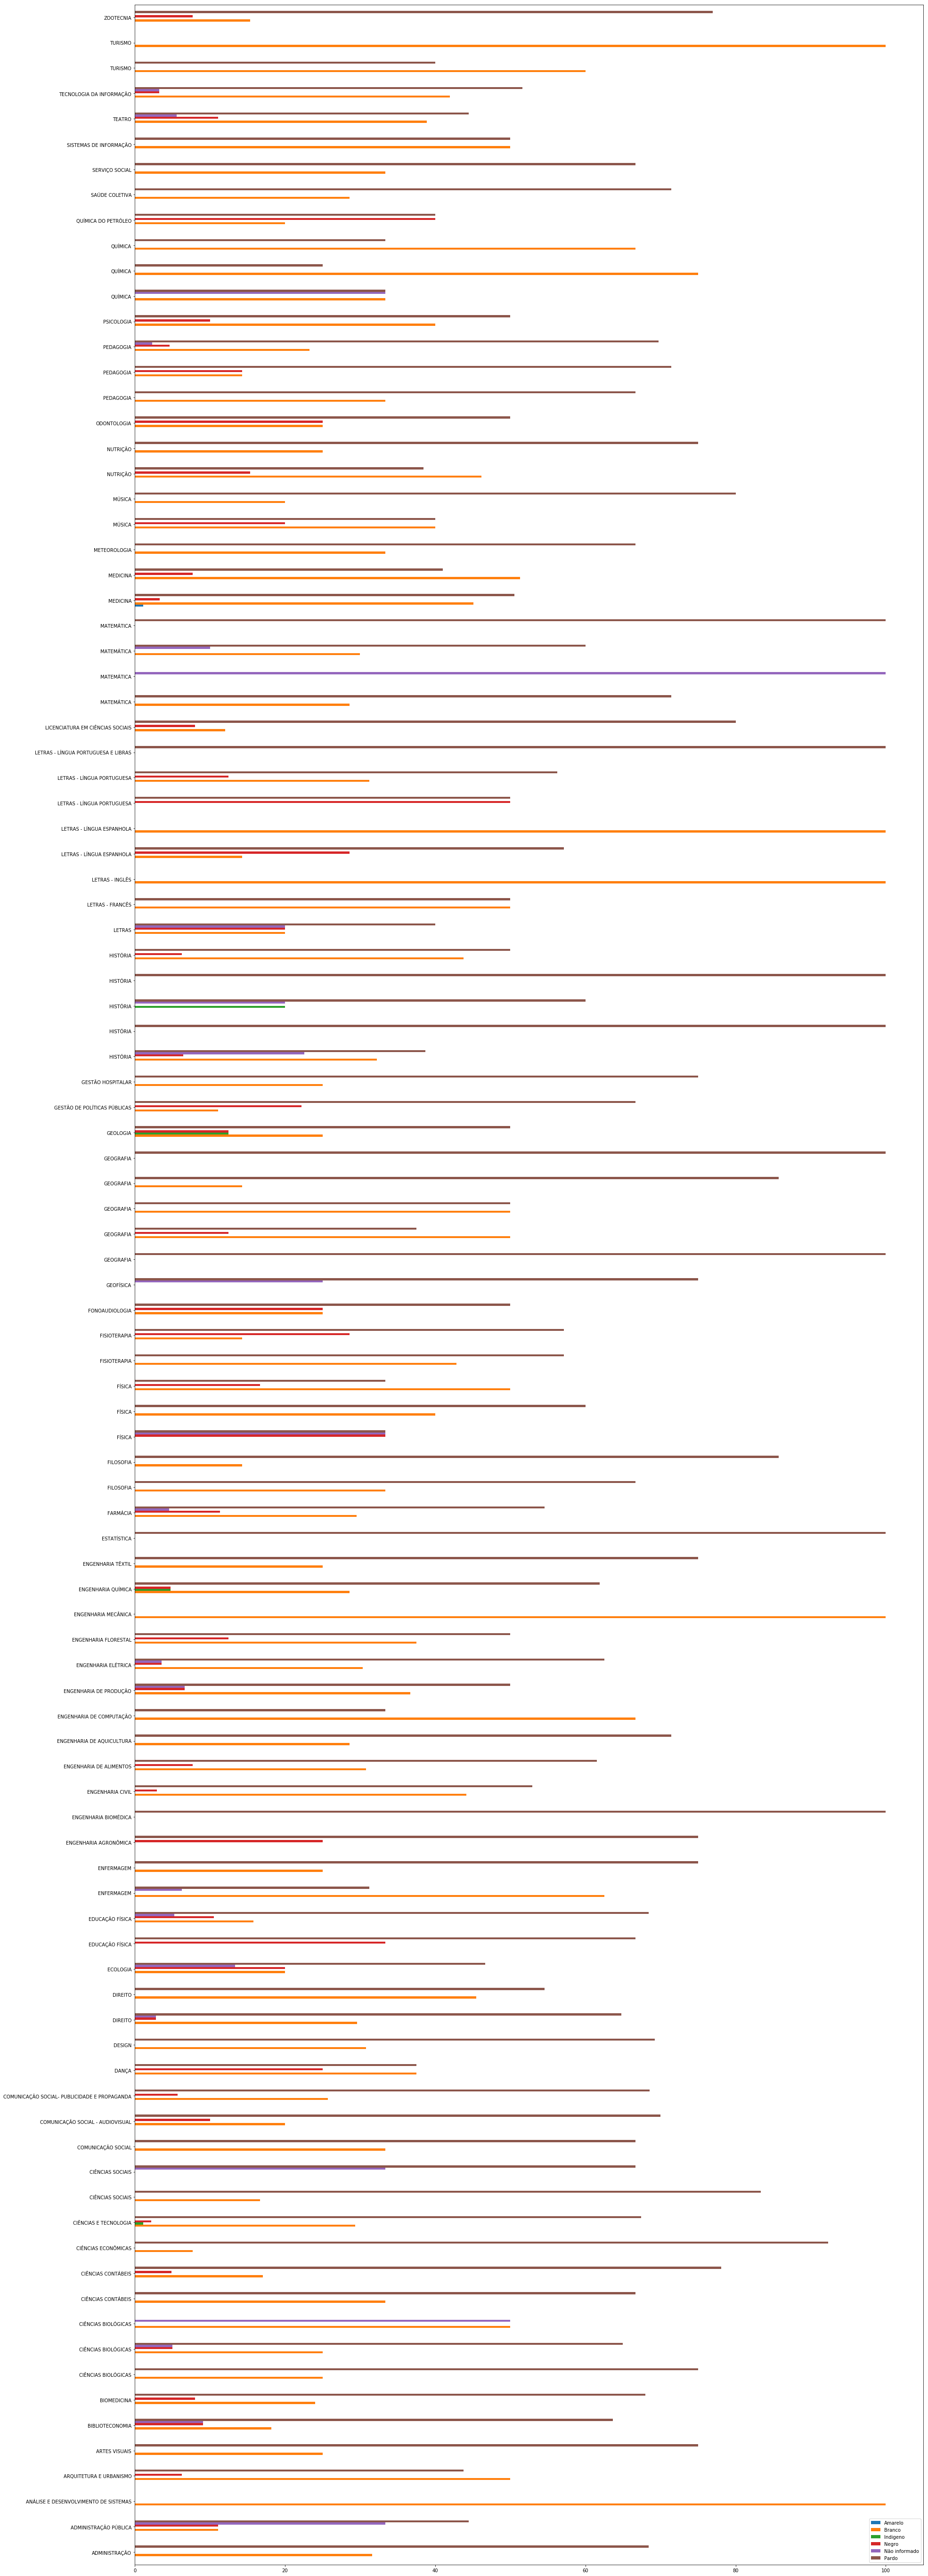

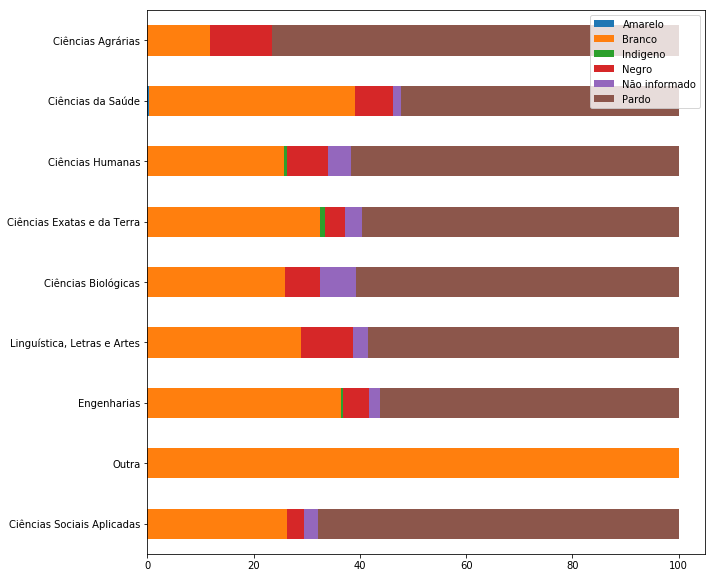

In [0]:
gera_dados(url_discentes_2014, url_cursos_2019, 2014)